<a href="https://colab.research.google.com/github/ChecoZamora/Tensorflow_Certificate/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression problem
- Predicting how much, or how many

## Inputs and outputs of a regression model
- Encode variables, predictors or features
- The main predicted variable

In [1]:
# import tensorflow
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


## Creating data to view and fit

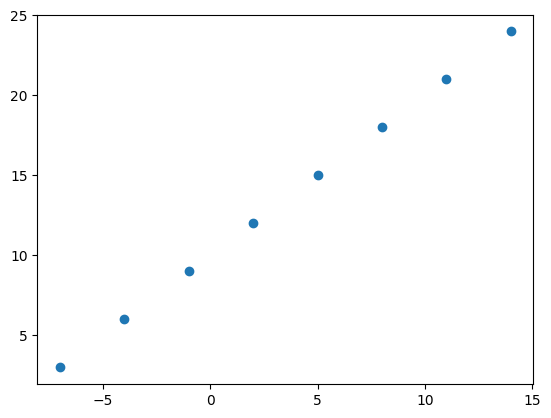

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X, y)
plt.show()

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
# y = X + 10
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [6]:
# Create demo tensor
# Turn pur numy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps i modelling with tensorflow

1. Creating a model - Define input and output layers, as well as hidden layers
2. Compiling a model - define the loss function, and the optimizer, and evaluation metrics
3. Fitting a model - Letting the model try to find patterns between X and y

### 1 Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

### 2 Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

### 3 Fit the model
model.fit(X_train, y_train, epochs=5)

### 4 Evaluate the model
model.evaluate(X_test, y_test)

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1 Create a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3 Fit the model
history = model.fit(tf.expand_dims(X, -1), y, epochs=30)

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 11.4870 - mae: 11.4870
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 11.3545 - mae: 11.3545
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 11.2220 - mae: 11.2220
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 11.0895 - mae: 11.0895
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 10.9570 - mae: 10.9570
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 10.8245 - mae: 10.8245
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 10.6920 - mae: 10.6920
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 10.5595 - mae: 10.5595
Epoch 9/30
1/1 [==============================] - 0s 19ms/step - loss: 10.4270 - mae: 10.4270
Epoch 10/30
1/1 [==============================] - 0s 19ms/step - loss: 10.2945 - mae: 10.2945
Epoch 11/30
1/1 [==============================] - 0s 16ms/st

dict_keys(['loss', 'mae'])


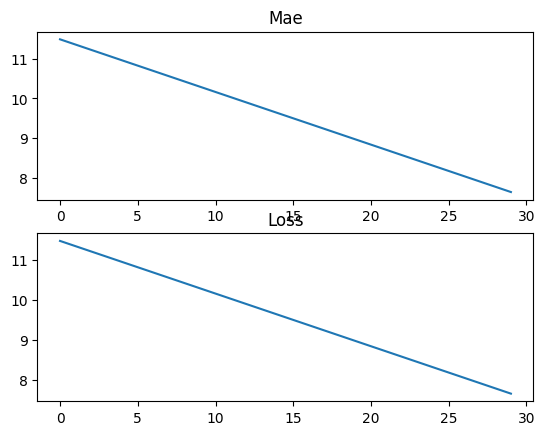

In [9]:
import matplotlib.pyplot as plt
print(history.history.keys())
figure, axis = plt.subplots(2)
axis[0].plot(history.history["mae"])
axis[0].set_title("Mae")
axis[1].plot(history.history["loss"])
axis[1].set_title("Loss")

plt.show()

In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Make a prediction using the model
model.predict(x=[17.0])

1/1 [==============================] - 0s 392ms/step


array([[27.927275]], dtype=float32)

## Improving our model
- We can improve a model the steps we took to create a model
1. **Creating a model** - Add more layers, increase the number of hidden layers, and change the activation functions of each layer
2. **Compiling a model** - Change the optimizaion function, or the learning rate
3. **Fitting a model** - Add epochs, or give the model more data

In [12]:
X_full = np.array([-3.0])
y_full = np.array([7.0])
for i in range(1001):
  X_full = np.append(X_full, X_full[-1]+3)
  y_full = np.append(y_full, y_full[-1]+3)

X_full = tf.cast(tf.constant(X_full), dtype=tf.float32)
y_full = tf.cast(tf.constant(y_full), dtype=tf.float32)
X_full, y_full

(<tf.Tensor: shape=(1002,), dtype=float32, numpy=array([  -3.,    0.,    3., ..., 2994., 2997., 3000.], dtype=float32)>,
 <tf.Tensor: shape=(1002,), dtype=float32, numpy=array([   7.,   10.,   13., ..., 3004., 3007., 3010.], dtype=float32)>)

In [13]:
# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# Compile model
model_1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss=tf.keras.losses.mae, metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_full, -1), y_full, epochs=500)

Epoch 1/500
32/32 [==============================] - 4s 4ms/step - loss: 509.7693 - mae: 509.7693
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 59.6154 - mae: 59.6154
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 21.4345 - mae: 21.4345
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 17.5801 - mae: 17.5801
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 31.0608 - mae: 31.0608
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 21.0715 - mae: 21.0715
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 20.4932 - mae: 20.4932
Epoch 8/500
32/32 [==============================] - 0s 4ms/step - loss: 14.7683 - mae: 14.7683
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 13.6896 - mae: 13.6896
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 11.6572 - mae: 11.6572
Epoch 11/500
32/32 [=================

In [14]:
model_1.predict([10.0])

1/1 [==============================] - 0s 81ms/step


array([[19.92498]], dtype=float32)

In [15]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 772ms/step - loss: 13.1046 - mae: 13.1046
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6097 - mae: 12.6097
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1365 - mae: 12.1365
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6599 - mae: 11.6599
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1755 - mae: 11.1755
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.6690 - mae: 10.6690
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 10.1376 - mae: 10.1376
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 9.5775 - mae: 9.5775
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9696 - mae: 8.9696
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2789 - mae: 8.2789
Epoch 11/100
1/1 [==============================] - 0s

In [16]:
# Predict
model_2.predict([10.0, 11.0, 12.0])

1/1 [==============================] - 0s 58ms/step


array([[19.04226 ],
       [20.848936],
       [22.655619]], dtype=float32)

## Improving a model

- Add layers
- Increase the number of hidden units
- Change the activation function
- Change the optimization function
- Change the learning rate
- Fitting on more data
- Fitting for longer


## Evaluating a model's performance

In practice the typicall workflow is
1. Build a model
2. Fit it
3. Evaluate it
4. Tweak the model
5. Fit it
6. Evaluate it
...




### When it comes to evaluation remember
> Visualize, visualize, visualize

It's a good idea to visualize:
1. The data
2. Model itself - What does our model look like
3. Traning of the model
4. Predictions

In [17]:
# Mae a bigger data set
X_1 = tf.range(-100, 100, 4)

y_1 = X_1 + 10

X_1, y_1

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

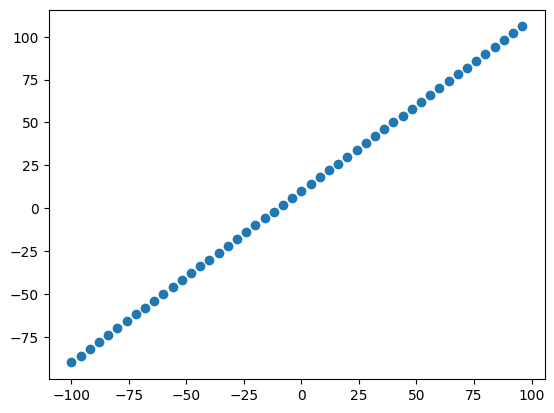

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_1, y_1)

### The 3 sets...
Split x and y into and 80% raining and 20% testing

1. **Traning** set - The model learns from this data 70 - 80%
2. **Validation** set - The model gets tunned with this data 10-15% (Optimizing)
3. **Test set** - The model gets evaluated on ghis data 10-15%

- Course Materials
- Practice Exam
- Final exam

In [19]:
# Check he lenght of how many samples we have
len(X_1)

50

In [20]:
# Split the data
X_train = X_1[:40]
X_test = X_1[40:]

y_train = y_1[:40]
y_test = y_1[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

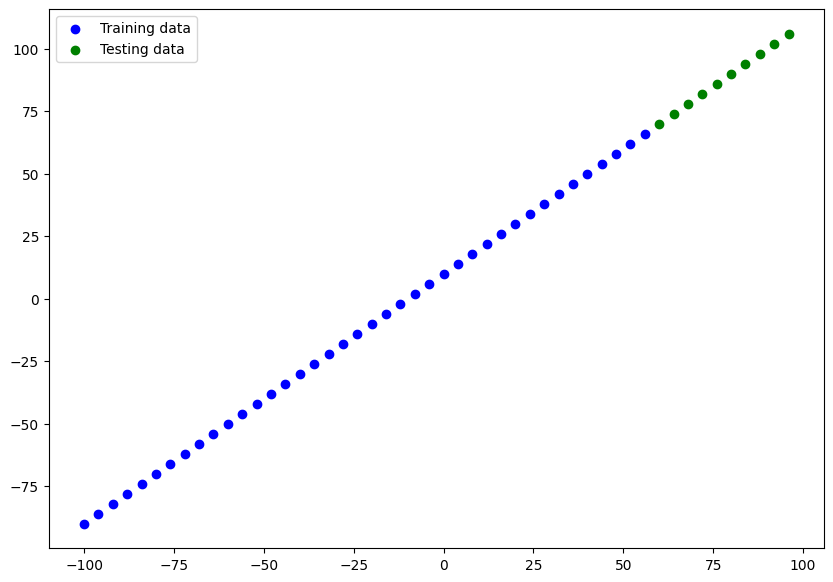

In [21]:
# Visualizing the data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [22]:
# Create a model

modell = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
modell.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Fit the model
modell.fit(tf.expand_dims(X_train, -1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 14ms/step - loss: 94.7585 - mae: 94.7585
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 59.3031 - mae: 59.3031
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 22.3542 - mae: 22.3542
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 12.9535 - mae: 12.9535
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 11.9947 - mae: 11.9947
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 9.2859 - mae: 9.2859
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 8.4535 - mae: 8.4535
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 9.0609 - mae: 9.0609
Epoch 9/50
2/2 [==============================] - 0s 23ms/step - loss: 18.4069 - mae: 18.4069
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 9.9423 - mae: 9.9423
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - lo

### Vizualising the model


In [23]:
modell.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
X[0].shape

TensorShape([])

In [25]:
# Lets create a model wich builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model
model_x = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model_x.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit
model_x.fit(tf.expand_dims(X_train, -1), y_train, epochs=50, verbose=0)

In [26]:
model_x.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - Total number of parameters in the model
* **Trainable params** - These are the parameters, the patterns, the model can update as it trains
* **Non-Trainable params** - It works more for pre-trained models



**Weights and biases**
Traniable parameters


# MIT Introduction to deep learning

- Deep Fake Project
- VISTA (Open Source For Autonomous cars Synthetic generated environments)
- Generating images from Natural Language
- Build software that can build software


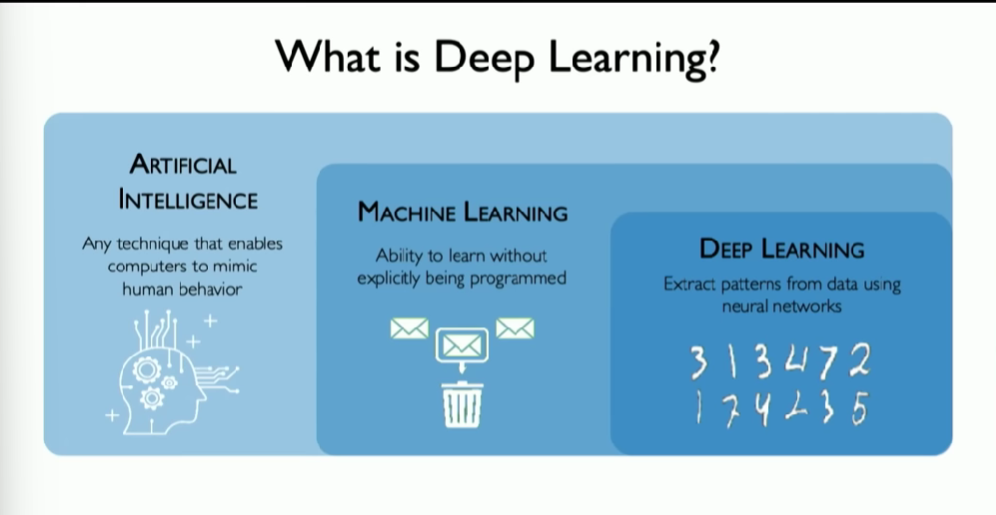

> Intelligence: Process information, to inform some future decision

**Deep Learning**
Extract Patterns from data using neural networks, that extract features in the data

### Projects

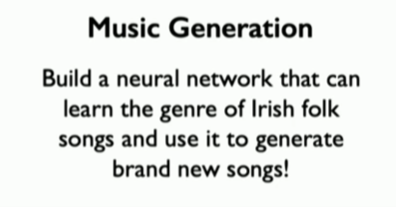

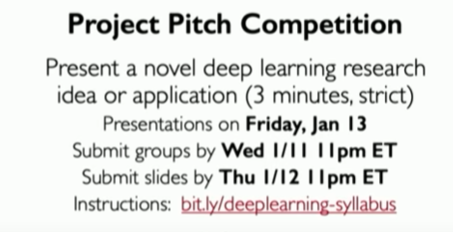

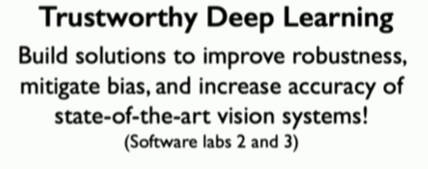

#### Why deep learning, and why now?

- Systems must be transformed by using deep learning and machine learning

**Key idea**:Have a machine, extract and define features automatcally

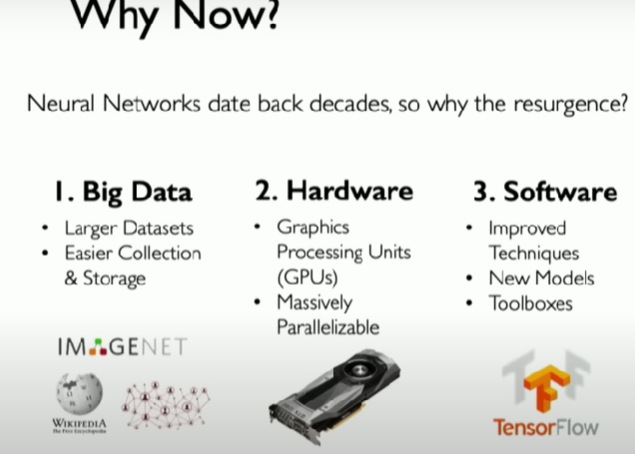

## Perceptron

Single neuron
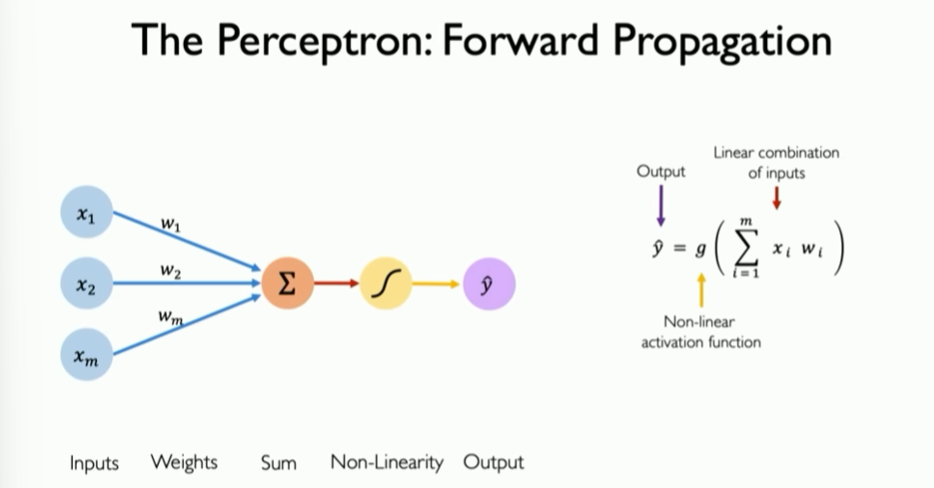

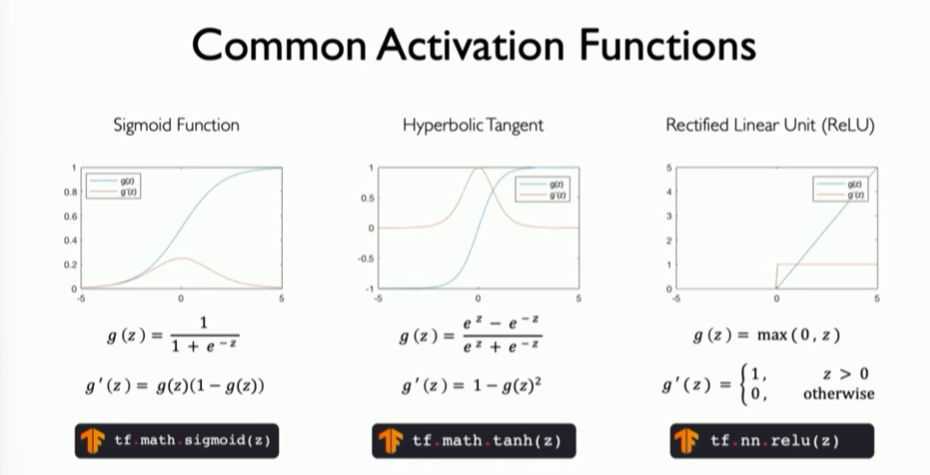

* Sigmoid - Probability bewteen 0 and 1
The activation of funcions if to introduce non-linearities into the network
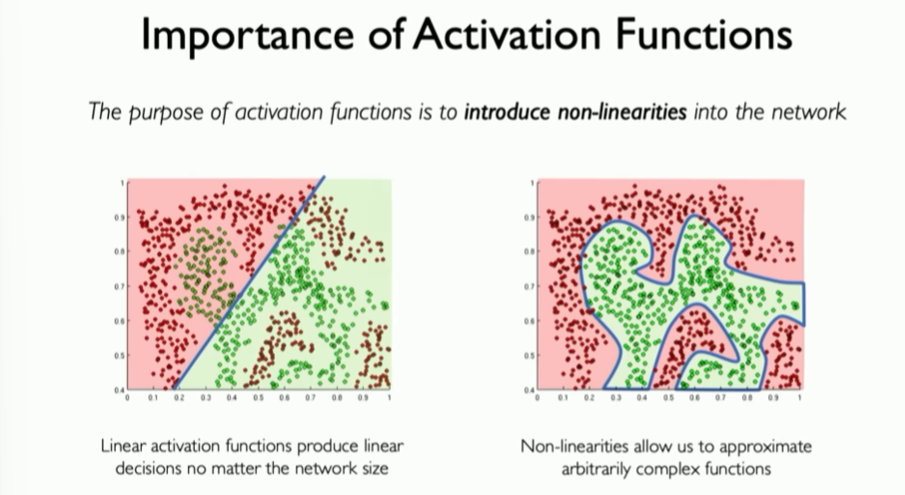

## Building NN with Perceptrons
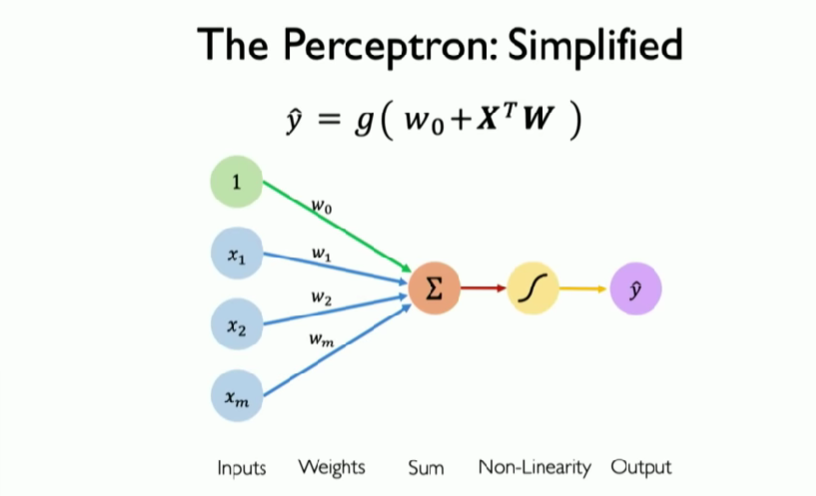

In [27]:
# Dense Layer from Scratch

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, input_dim, output_dim):
    super(MyDenseLayer, self).__init__()

    # Initialize weights and bias
    self.W = self.add_weight((input_dim, output_dim))
    self.b = self.add_weight([1, output_dim])

    def call(self, inputs):
      #Forward propagate the inputs
      z = tf.matmul(inputs, self.W) + self.b

      # Feed through a non-linear activation
      output = tf.math.sigmoid(z)

      return output

# All of the above is layer = tf.keras.layers.Dense(units=2)


Explanation:
This code defines a custom dense layer implementation called MyDenseLayer using TensorFlow. This dense layer consists of weights and biases, and it applies the sigmoid activation function to its output during the forward pass. Let's go through it step-by-step:

class MyDenseLayer(tf.keras.layers.Layer):

This line defines a new class called MyDenseLayer, which is a subclass of tf.keras.layers.Layer. This means our custom layer will inherit some functionalities from TensorFlow's base layer class.
def __init__(self, input_dim, output_dim):

This is the constructor method of the class. It is called when an instance of MyDenseLayer is created. The constructor takes two arguments, input_dim and output_dim, which represent the dimensions of the input and output of the dense layer, respectively.
super(MyDenseLayer, self).__init__()

This line calls the constructor of the parent class (tf.keras.layers.Layer) to ensure that the necessary initialization is performed for the custom layer.
self.W = self.add_weight((input_dim, output_dim))

Here, a weight matrix W is created for the dense layer using self.add_weight(). The weight matrix connects the neurons from the input layer to the neurons of the output layer. The shape of the weight matrix is determined by the input_dim and output_dim values provided during the layer's initialization.
self.b = self.add_weight([1, output_dim])

Similarly, a bias vector b is created for the dense layer using self.add_weight(). The bias vector is added to the output of the weighted input to introduce a level of flexibility and allow the model to capture complex relationships between features. The shape of the bias vector is [1, output_dim], where output_dim represents the number of neurons in the output layer.
def call(self, inputs):

This method defines the forward pass of the custom dense layer. It takes inputs as an argument, which represents the input tensor to the layer.
z = tf.matmul(inputs, self.W) + self.b

The input tensor is multiplied with the weight matrix W, and the bias vector b is added to the result. This step performs the linear transformation of the input features based on the learned weights and biases.
output = tf.math.sigmoid(z)

The sigmoid activation function is applied to the result of the linear transformation (z). The sigmoid function maps the output to the range [0, 1], making it suitable for binary classification problems or as a squashing function to introduce non-linearity in the neural network.
return output

The output tensor after the forward pass is returned.
Overall, this MyDenseLayer class defines a custom dense layer that applies a sigmoid activation function to its output during the forward pass. The layer can be used as a building block in a neural network to introduce non-linearity and perform binary classification tasks or other tasks where the output needs to be bounded between 0 and 1.

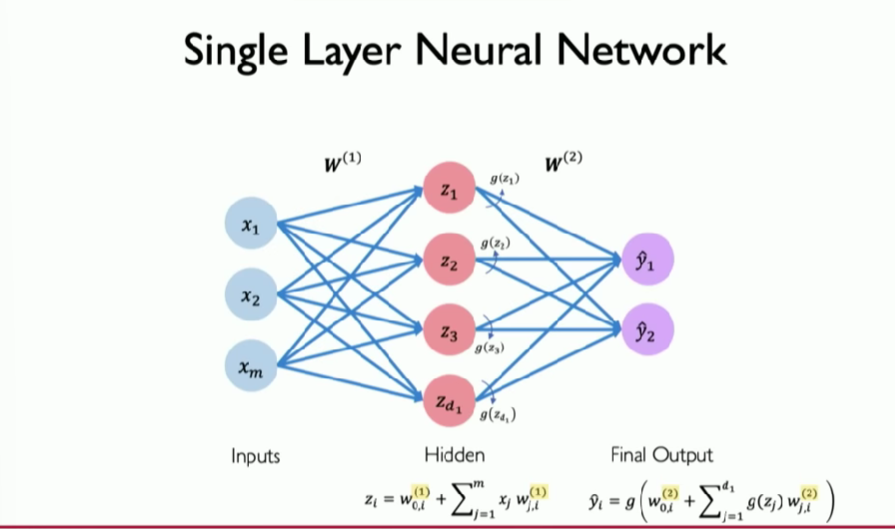

**Deep** Neural Network: Keep stacking layers of neurons on top of each other

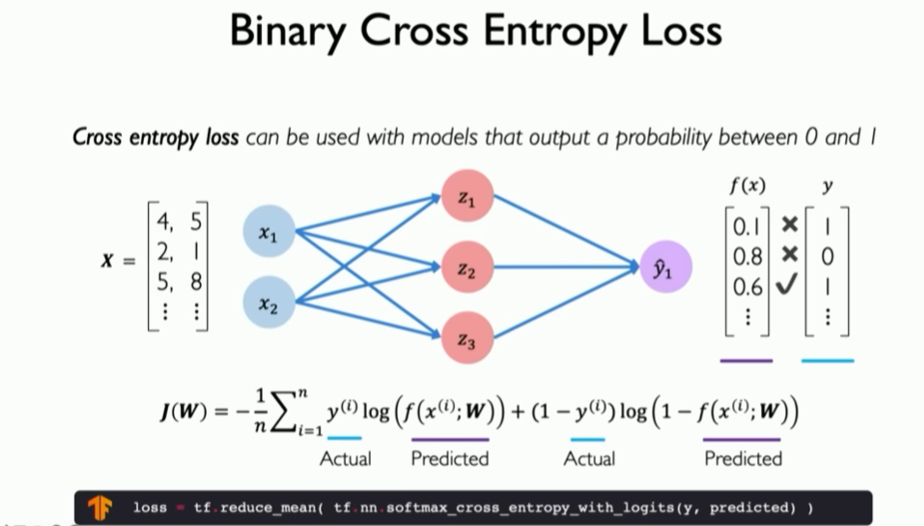

Compute loss gradient?
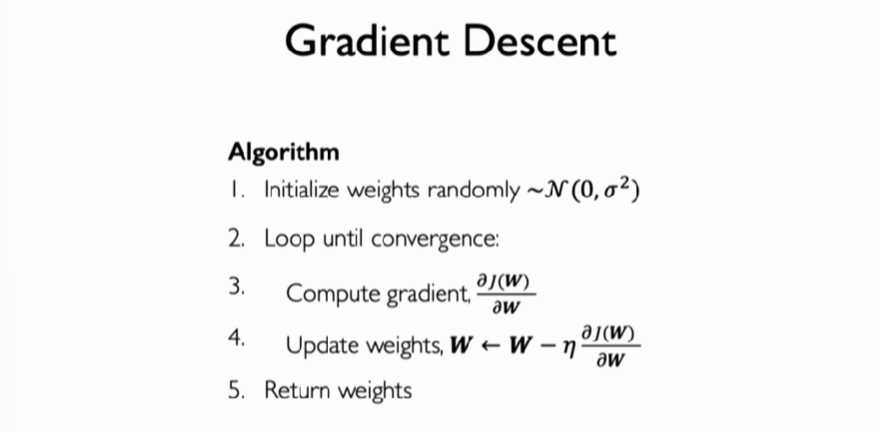

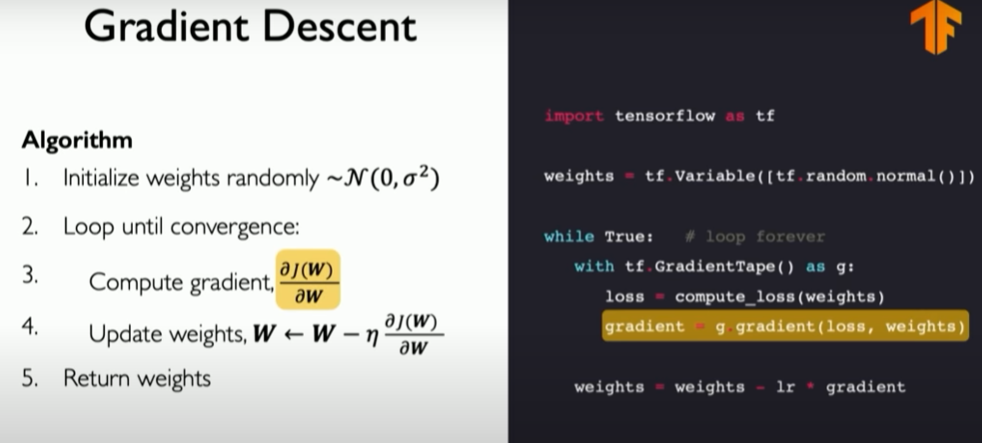

**Back propagation**
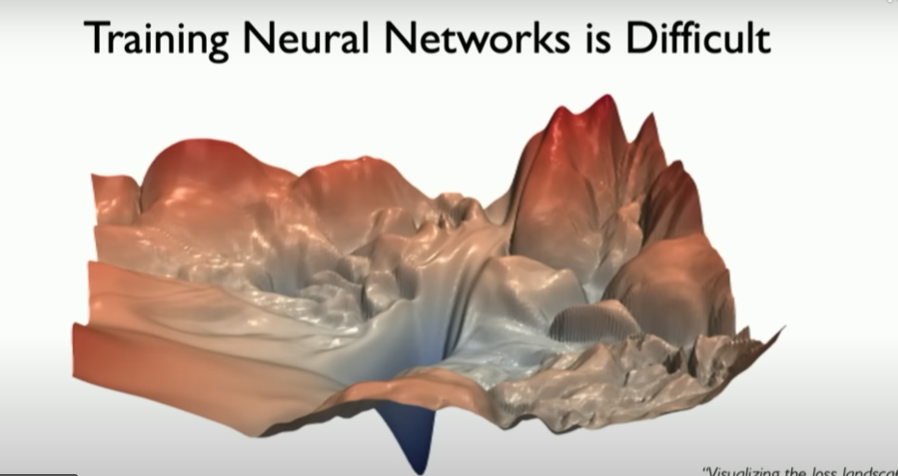

#### How to set the learnig rates
1. Try lots of different learning rattes and see what works just right
2. Design an adaptuve learning rate that "adapts" to the landscape

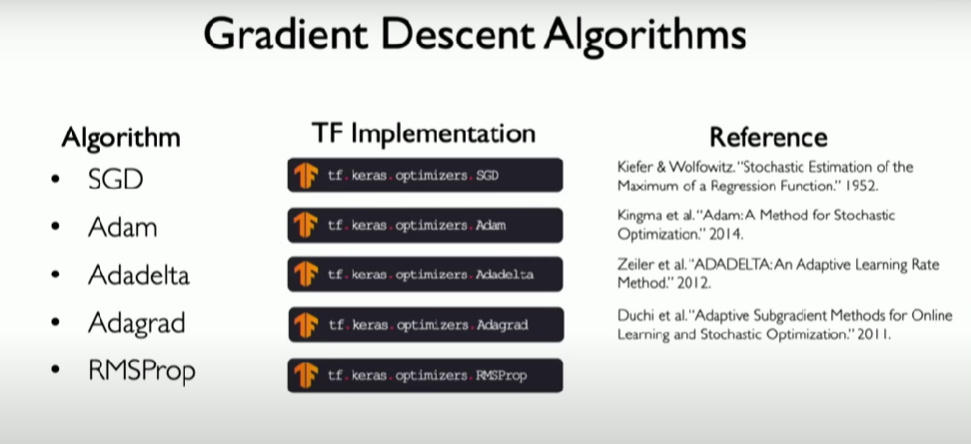

#### Mini Batches
- Faster training
- Parallel computing

#### Visualizing a models layers

In [28]:
# Get summary of the model
model_x.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model

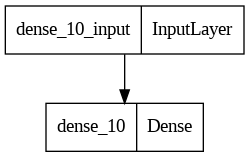

In [30]:
plot_model(model_x)

In [31]:
# Create model
model_y = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile model
model_y.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit model
model_y.fit(tf.expand_dims(X_train, -1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 31.4164 - mae: 31.4164
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 33.4737 - mae: 33.4737
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 17.2910 - mae: 17.2910
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 26.7904 - mae: 26.7904
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 20.5573 - mae: 20.5573
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 20.6888 - mae: 20.6888
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 24.5297 - mae: 24.5297
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 8.8654 - mae: 8.8654
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 67.7173 - mae: 67.7173
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 34.1710 - mae: 34.1710
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss

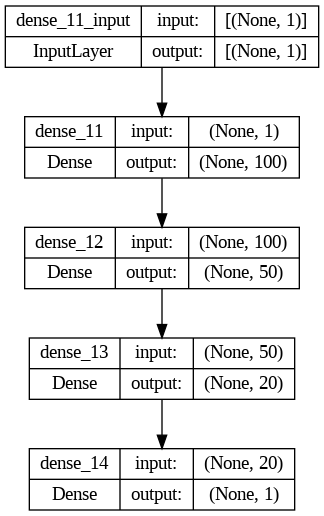

In [32]:
plot_model(model_y, show_shapes=True)

In [33]:
# Another model
model_z = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="One of many models")

# Compile the model

model_z.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

In [34]:
model_z.summary()

Model: "One of many models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


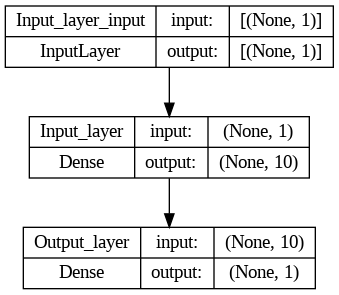

In [35]:
plot_model(model_z, show_shapes=True)

### Visualizing models predictions
To visualize predictions is a good idea to plot them againts the ground labels

often we will see this as Y_test of Y_true VS Y_pred

In [36]:
# Make some predictions
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 77ms/step


array([[ 69.83448 ],
       [ 73.822754],
       [ 77.811035],
       [ 81.799385],
       [ 85.787735],
       [ 89.776085],
       [ 93.76439 ],
       [ 97.752625],
       [101.74086 ],
       [105.72908 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

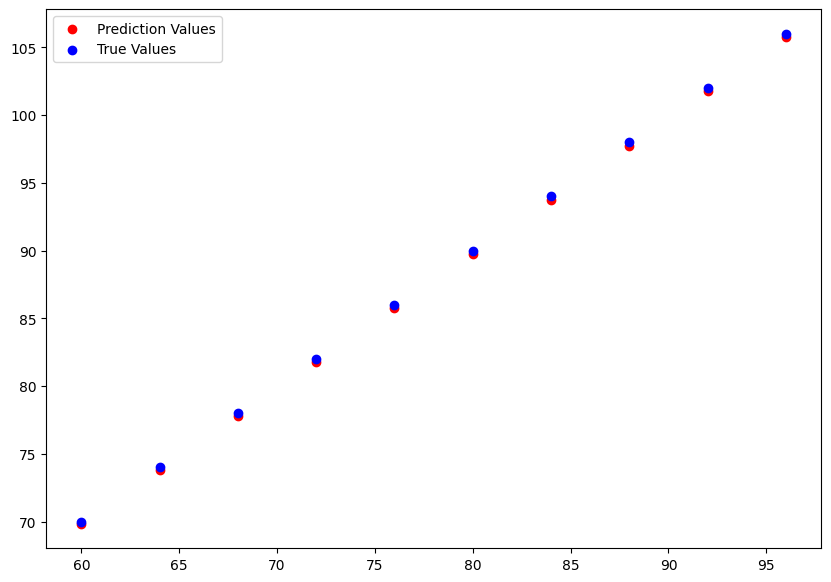

In [38]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_pred, c="r", label="Prediction Values")
plt.scatter(X_test, y_test, c="b", label="True Values")
plt.legend();

In [39]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  Plot training data, test data and compares predictins to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(test_data, predictions, c="r", label="Prediction Values")
  plt.scatter(test_data, test_labels, c="b", label="True Values")
  plt.scatter(train_data, train_labels, c="g", label="Training data")
  plt.legend();

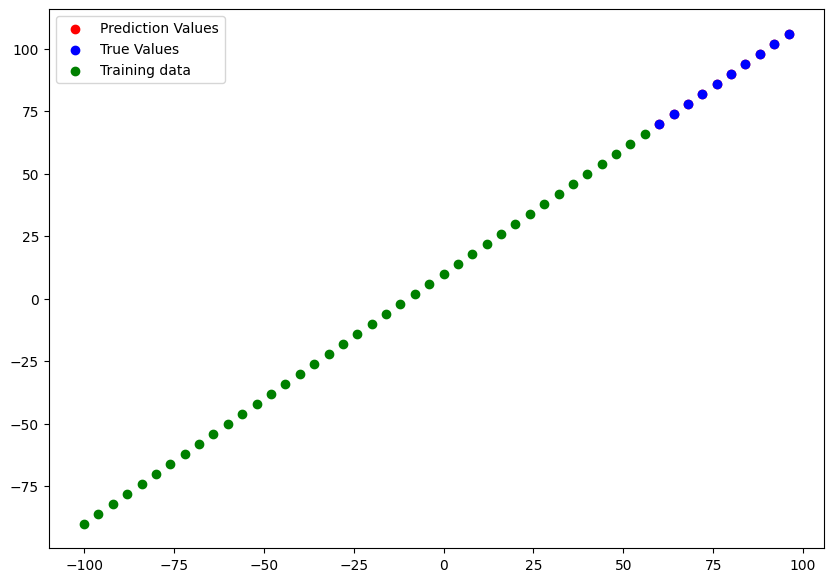

In [40]:
plot_predictions()

### Evaluating our models predictions with evaluations metrics

Depending on the problem, there will be different evaluation metrics to evaluate your models performance

* MAE  - On average how wrong is each of my models predictions
* MSE - Square the average errors (Use when larger error are more significant than smaller errors)

In [41]:
# Evaluate the model o the test set
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 162ms/step - loss: 0.2182 - mae: 0.2182


[0.21815720200538635, 0.21815720200538635]

In [42]:
y_pred.shape

(10, 1)

In [43]:
y_pred = tf.squeeze(y_pred)
y_pred.shape

TensorShape([10])

In [44]:
y_test.shape

TensorShape([10])

In [45]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [46]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.2181572>

In [47]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.2181572>

In [48]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.04872197>

In [65]:
# Functions for MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))


### Running experimets to improve our model

Build a model > Fit it > Evaluate > Tweak

*Machine learning practitioners motto*

Experiment, experiment, experiment

1. Get more data (More examples)
2. Make your model larger (More layers, deeper model)
3. Train for longer

In [50]:
model_1.predict([18.0])

1/1 [==============================] - 0s 269ms/step


array([[27.910162]], dtype=float32)

Lets do 3 modelling experiments
1. 1 layer 100 epochs
2. 2 layers, trained for 100 epochs
3. 2 layers 500 epochs

In [58]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

**Model A**

1 dense layer 100 epochs

In [69]:
# Model A

# Create model
tf.random.set_seed(42)
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_a.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# Fit the model
model_a.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 66.7265 - mae: 66.7265
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 31.6042 - mae: 31.6042
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9058 - mae: 9.9058
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1316 - mae: 12.1316
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1907 - mae: 11.1907
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3330 - mae: 10.3330
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3273 - mae: 9.3273
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2261 - mae: 9.2261
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 11.8911 - mae: 11.8911
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.8378 - mae: 13.8378
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

In [70]:
y_pred_a = model_a.predict(X_test)
y_pred_a

1/1 [==============================] - 0s 44ms/step


array([[ 74.5659  ],
       [ 79.451836],
       [ 84.33777 ],
       [ 89.2237  ],
       [ 94.10964 ],
       [ 98.995575],
       [103.88151 ],
       [108.76745 ],
       [113.65338 ],
       [118.539314]], dtype=float32)

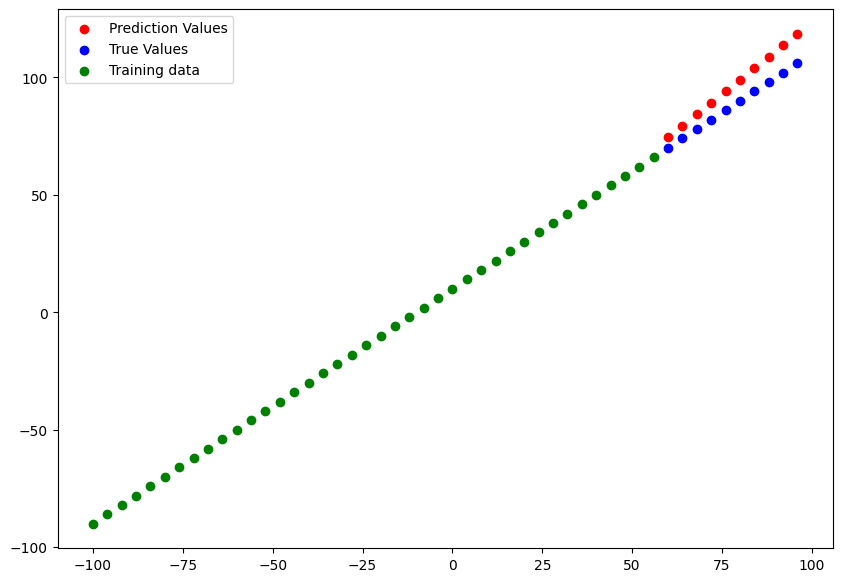

In [71]:
plot_predictions(predictions=y_pred_a)

In [72]:
mae_a = mae(y_test, y_pred_a)
mae_a

<tf.Tensor: shape=(), dtype=float32, numpy=8.552608>

In [93]:
mse_a = mse(y_test, y_pred_a)
mse_a

<tf.Tensor: shape=(), dtype=float32, numpy=79.62236>

**Model B**

2 dense layers 100 epochs

In [78]:
# Model B

# Create model

model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_b.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_b.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 13ms/step - loss: 36.7815 - mae: 36.7815
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 19.5027 - mae: 19.5027
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 14.0960 - mae: 14.0960
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1258 - mae: 8.1258
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.9891 - mae: 10.9891
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 9.2896 - mae: 9.2896
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2134 - mae: 13.2134
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 14.1805 - mae: 14.1805
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 22.1605 - mae: 22.1605
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 10.3568 - mae: 10.3568
Epoch 11/100
2/2 [==============================] - 0s 

In [80]:
y_pred_b = model_b.predict(X_test)
y_pred_b

1/1 [==============================] - 0s 30ms/step


array([[ 65.17849 ],
       [ 69.4748  ],
       [ 73.771126],
       [ 78.067444],
       [ 82.36377 ],
       [ 86.660065],
       [ 90.95639 ],
       [ 95.252686],
       [ 99.54899 ],
       [103.84528 ]], dtype=float32)

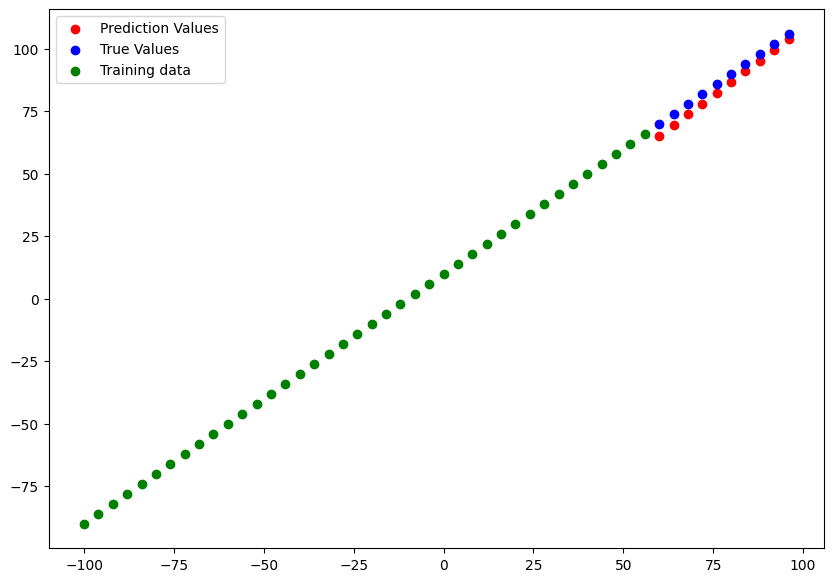

In [81]:
plot_predictions(predictions=y_pred_b)

In [85]:
mae_b = mae(y_test, y_pred_b)
mse_b = mse(y_test, y_pred_b)
mae_b, mse_b

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4880958>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.891167>)

**Model C**

2 Dense layers 500 epochs

In [88]:
# Model C

# Create Model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_c.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_c.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 39.3212 - mae: 39.3212
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 19.0213 - mae: 19.0213
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 15.6556 - mae: 15.6556
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 6.9741 - mae: 6.9741
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1469 - mae: 9.1469
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 5.0377 - mae: 5.0377
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.1712 - mae: 12.1712
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 7.5117 - mae: 7.5117
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 22.6513 - mae: 22.6513
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 12.6203 - mae: 12.6203
Epoch 11/500
2/2 [==============================] - 0s 8ms/step 

In [89]:
y_pred_c = model_c.predict(X_test)
y_pred_c

1/1 [==============================] - 0s 165ms/step


array([[ 70.6489  ],
       [ 75.12665 ],
       [ 79.60437 ],
       [ 84.08202 ],
       [ 88.55967 ],
       [ 93.03728 ],
       [ 97.514885],
       [101.9925  ],
       [106.47012 ],
       [110.947754]], dtype=float32)

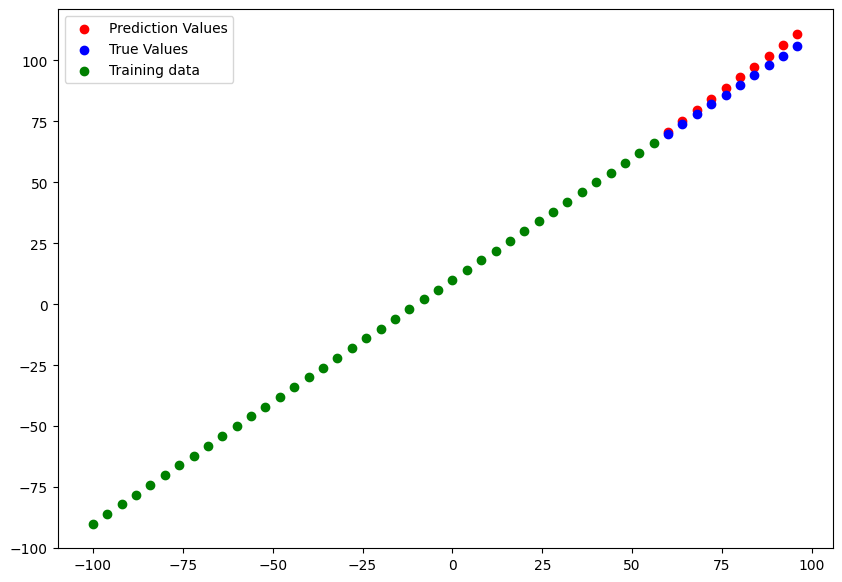

In [90]:
plot_predictions(predictions=y_pred_c)

In [91]:
mae_c = mae(y_test, y_pred_c)
mse_c = mse(y_test, y_pred_c)
mae_c, mse_c

(<tf.Tensor: shape=(), dtype=float32, numpy=2.7984154>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.713294>)

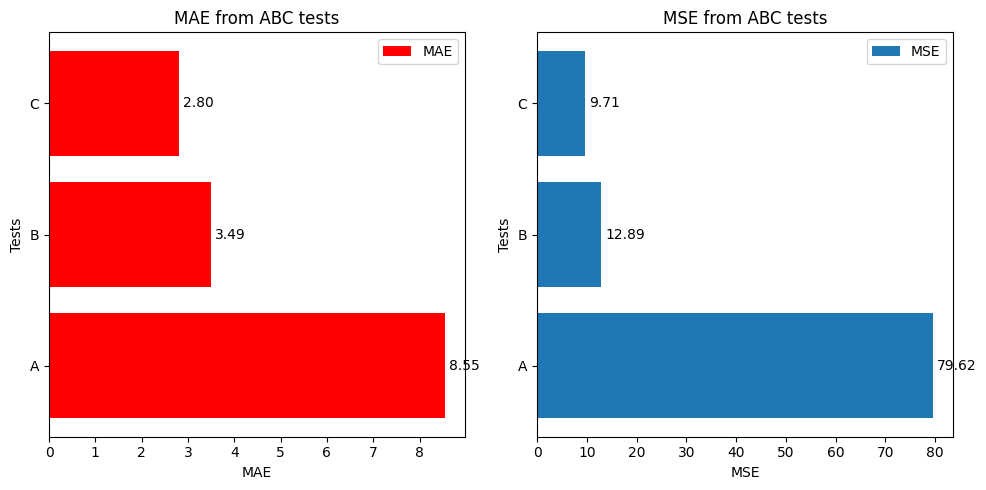

In [105]:
import matplotlib.pyplot as plt

# Sample data (replace these with your actual values)
mae_abc = [mae_a, mae_b, mae_c]
mse_abc = [mse_a, mse_b, mse_c]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot MAE on the first subplot
mae_bars = axes[0].barh(["A", "B", "C"], mae_abc, label="MAE", color="r")
axes[0].set_xlabel("MAE")
axes[0].set_ylabel("Tests")
axes[0].set_title("MAE from ABC tests")

# Plot MSE on the second subplot
mse_bars = axes[1].barh(["A", "B", "C"], mse_abc, label="MSE")
axes[1].set_xlabel("MSE")
axes[1].set_ylabel("Tests")
axes[1].set_title("MSE from ABC tests")

# Function to add annotations to the bars
def add_bar_annotations(bars, ax):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',  # Display value with 2 decimal places
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset from the bar
                    textcoords="offset points",
                    ha='left', va='center')

# Add annotations to the MAE bars
add_bar_annotations(mae_bars, axes[0])

# Add annotations to the MSE bars
add_bar_annotations(mse_bars, axes[1])

# Add legend to both subplots
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()


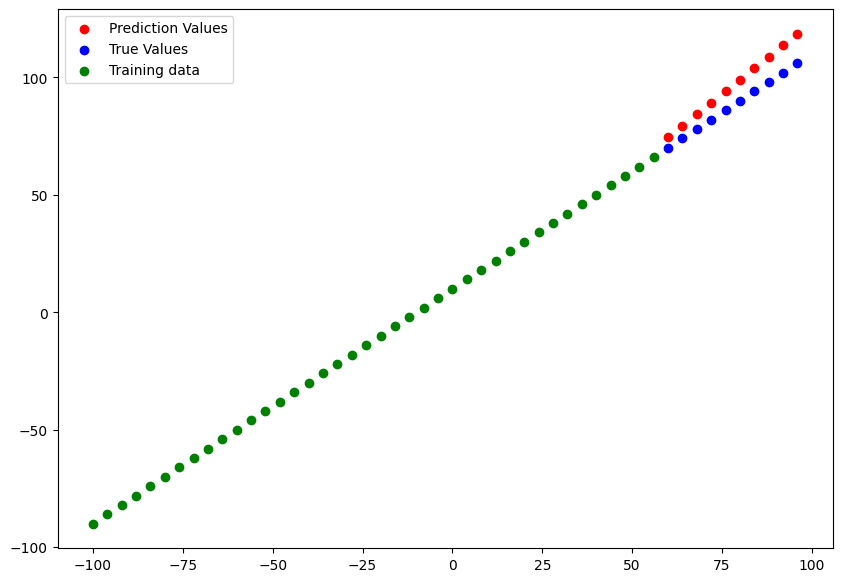

In [100]:
plot_predictions(predictions=y_pred_a)

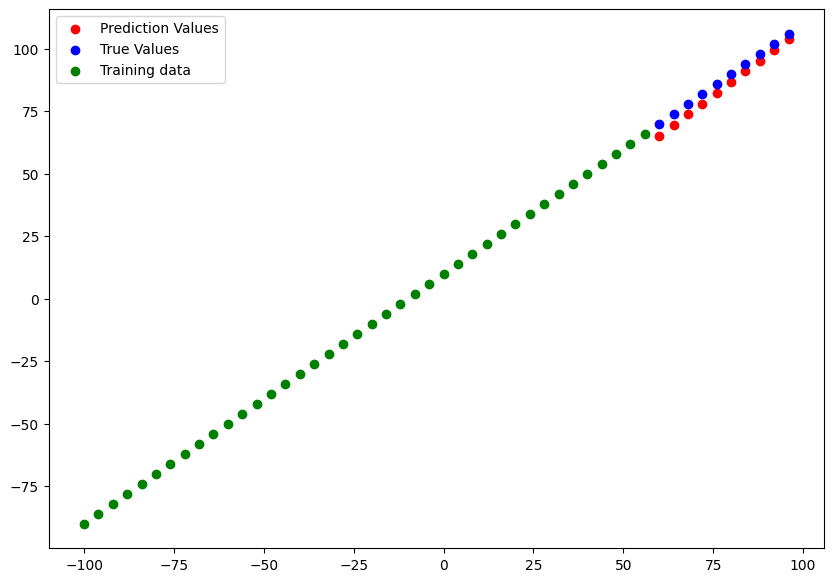

In [101]:
plot_predictions(predictions=y_pred_b)

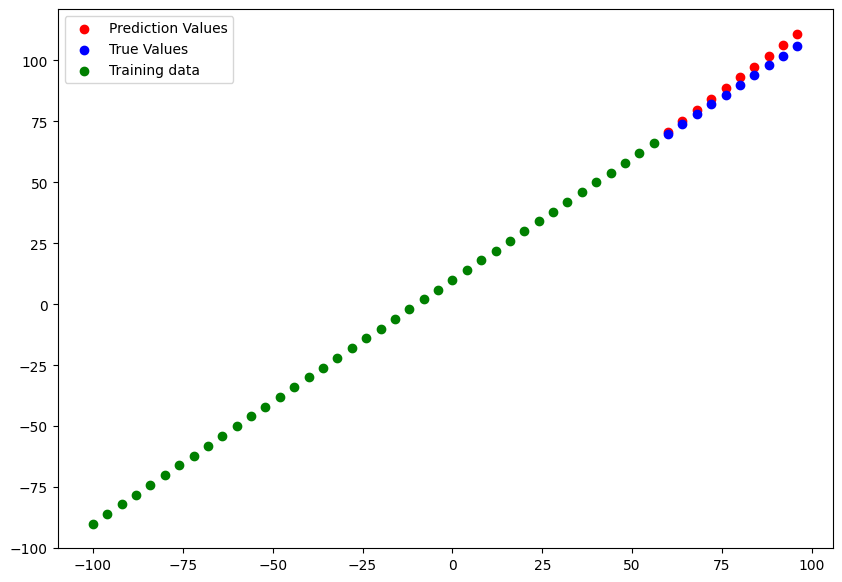

In [102]:
plot_predictions(predictions=y_pred_c)

**Best Model So Far**

model_1

In [113]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

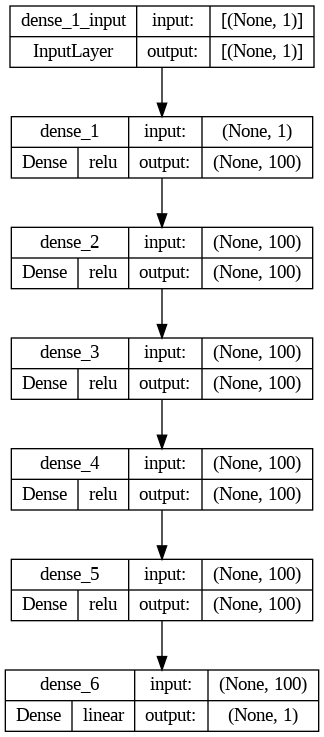

In [111]:
plot_model(model_1, show_shapes=True, show_layer_activations=True)

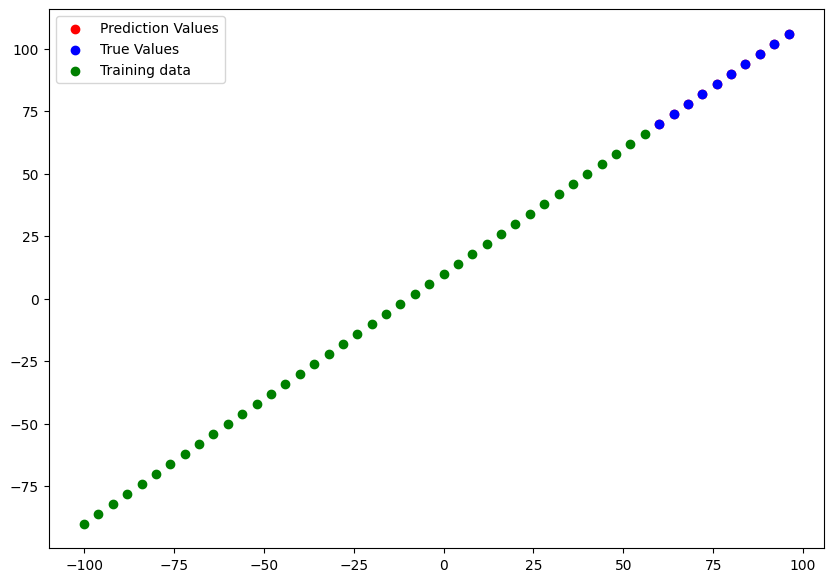

In [114]:
plot_predictions(predictions=y_pred)

In [115]:
mae_1 = mae(y_test, y_pred)
mse_1 = mse(y_test, y_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.2181572>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.04872197>)

In [116]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 190ms/step - loss: 0.1147 - mae: 0.1147


[0.11470947414636612, 0.11470947414636612]

In [122]:
import pandas as pd
model_results = [["Model_1", mae_1.numpy(), mse_1.numpy()],
                ["Model_A", mae_a.numpy(), mse_a.numpy()],
                ["Model_B", mae_b.numpy(), mse_b.numpy()],
                ["Model_C", mae_c.numpy(), mse_c.numpy()]]
df_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
df_results

,Model,MAE,MSE
0,Model_1,0.218157,0.048722
1,Model_A,8.552608,79.622360
2,Model_B,3.488096,12.891167
3,Model_C,2.798415,9.713294


In [125]:
model_1.predict([10.0])

1/1 [==============================] - 0s 181ms/step


array([[19.989151]], dtype=float32)

**Tensorboard**

### Saving models

Saving models allows us to use them outside Google Collab, such as webapplications or web apps

**To retrieve model**
tf.keras.models.load_model

**To save model**
model.save("path/model_name")

1. SaveModel Format
2. The HDF5 Format

In [126]:
# Save using the save model format
model_1.save("Best_model_SavedModel_Format")

In [127]:
# Save model using HDF5 format
model_1.save("Best_Model_HDF5_format.h5")